OLD NOTEBOOK: Attempt by Max

In [26]:
# Requires to have geopandas installed
# Installation https://geopandas.org/getting_started/install.html

import geopandas as gpd
import geoplot
import pandas as pd
import fiona  # ;help(fiona.open)
import requests
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize  # convert json into dataframe

In [2]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#  Adding MENA to Africa

In [3]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# world

In [4]:
saudi = world.query('name == "Saudi Arabia"')
yemen = world.query('name == "Yemen"')
iraq = world.query('name == "Iraq"')
oman = world.query('name == "Oman"')
uae = world.query('name == "United Arab Emirates"')
jordan = world.query('name == "Jordan"')
palestine = world.query('name == "Palestine"')
israel = world.query('name == "Israel"')
qatar = world.query('name == "Qatar"')
kuwait = world.query('name == "Kuwait"')

mena = (
    saudi.append(yemen)
    .append(iraq)
    .append(oman)
    .append(uae)
    .append(jordan)
    .append(palestine)
    .append(israel)
    .append(qatar)
    .append(kuwait)
)

In [5]:
africa = world.query('continent == "Africa"').append(mena)
# africa.head()

In [6]:
### Example plot https://geopandas.org/gallery/plotting_with_geoplot.html?highlight=africa

# #gdp_per_cap = world.gdp_md_est / world.pop_est
# ax = geoplot.cartogram(
#     africa, scale='pop_est', limits=(0.2, 1),
#     edgecolor='None', figsize=(7, 8)
# )
# geoplot.polyplot(africa, edgecolor='gray', ax=ax)

In [7]:
# ax = africa.plot(color="white", edgecolors="red",figsize=(10, 10))

# 1) HV lines (current & planned) - Onsset

Note: This dataset has been updated with transmission lines for the MENA region. This is the most complete and up-to-date open map of Africa's electricity grid network. This dataset serves as an updated and improved replacement for the Africa Infrastructure Country Diagnostic (AICD) data that was published in 2007. 

Coverage. This dataset includes planned and existing grid lines for all continental African countries and Madagascar, as well as the Middle East region. The lines range in voltage from sub-kV to 700 kV EHV lines, though there is a very large variation in the completeness of data by country. An interactive tool has been created for exploring this data, the Africa Electricity Grids Explorer. 

Sources. The primary sources for this dataset are as follows: 
- Africa Infrastructure Country Diagnostic (AICD) 
- OSM © OpenStreetMap contributors 
- For MENA: Arab Union of Electricity and country utilities. 
- For West Africa: West African Power Pool (WAPP) 
- GIS database 
- World Bank projects archive and 
- International Bank for Reconstruction and Development (IBRD) maps 
- There were many additional sources for specific countries and areas. This information is contained in the files of this dataset, and can also be found by browsing the individual country datasets, which contain more extensive information. 

Limitations. Some of the data, notably that from the AICD and from World Bank project archives, may be very out of date. Where possible this has been improved with data from other sources, but in many cases this wasn't possible. This varies significantly from country to country, depending on data availability. Thus, many new lines may exist which aren't shown, and planned lines may have completely changed or already been constructed. 
The data that comes from World Bank project archives has been digitized from PDF maps. This means that these lines should serve as an indication of extent and general location, but shouldn't be used for precisely location grid lines.

https://energydata.info/dataset/africa-electricity-transmission-and-distribution-grid-map-2017

In [8]:
url = "https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/144823/africagrid20170906final.geojson"
africa_network = gpd.read_file(url)

In [9]:
# Converting object to float
africa_network["length_km"] = pd.to_numeric(
    africa_network["length_km"], errors="ignore"
)

In [10]:
africa_network.head()

,status,country,source,operator,from,to,voltage_kV,length_km,geometry
0,Existing,Togo,ECREEE,None,None,None,161.0,61,"LINESTRING (1.55338 6.50436, 1.55434 6.50452, ..."
1,Planned,Togo,ECREEE,None,None,None,161.0,47,"LINESTRING (1.61346 6.90184, 1.19756 6.94277)"
2,Existing,Togo,ECREEE,None,None,None,63.0,5,"LINESTRING (1.13825 9.03338, 1.13916 9.03056, ..."
3,Planned,Togo,ECREEE,None,None,None,330.0,138,"LINESTRING (-0.01500 9.45716, 1.22248 9.52457)"
4,Planned,Togo,ECREEE,None,None,None,330.0,154,"LINESTRING (1.22326 9.52457, 2.59111 9.33189)"


In [19]:
africa_network[africa_network.voltage_kV > 110]

,status,country,source,operator,from,to,voltage_kV,length_km,geometry
0,Existing,Togo,ECREEE,None,None,None,161.0,61,"LINESTRING (1.55338 6.50436, 1.55434 6.50452, ..."
1,Planned,Togo,ECREEE,None,None,None,161.0,47,"LINESTRING (1.61346 6.90184, 1.19756 6.94277)"
3,Planned,Togo,ECREEE,None,None,None,330.0,138,"LINESTRING (-0.01500 9.45716, 1.22248 9.52457)"
4,Planned,Togo,ECREEE,None,None,None,330.0,154,"LINESTRING (1.22326 9.52457, 2.59111 9.33189)"
5,Planned,Togo,ECREEE,None,None,None,161.0,90,"LINESTRING (0.99578 10.99504, 0.19002 10.89152)"
...,...,...,...,...,...,...,...,...,...
61996,Existing,Yemen,Arab Union of Electricity and country utilities,None,Ibb,Dhamar,150.0,68,"LINESTRING (44.17708 13.96949, 44.40022 14.54263)"
61997,Existing,Yemen,Arab Union of Electricity and country utilities,None,Sanaa,Dhamar,150.0,92,"LINESTRING (44.40022 14.54263, 44.20635 15.34830)"
61998,Existing,Yemen,Arab Union of Electricity and country utilities,None,Sanaa,Marib,300.0,116,"LINESTRING (44.20635 15.34834, 45.23803 15.403..."
61999,Existing,Yemen,Arab Union of Electricity and country utilities,None,Sanaa,Amran,150.0,46,"LINESTRING (44.20635 15.34834, 43.94521 15.66310)"


In [11]:
print(
    "Data with zero Voltage inputs:\n",
    africa_network[(africa_network["voltage_kV"] == 0)].describe(),
)
print()
print(
    "Data with non-zero Voltage inputs:\n",
    africa_network[(africa_network["voltage_kV"] != 0)].describe(),
)
print()
print(
    "Data with zero Length inputs:\n",
    africa_network[(africa_network["length_km"] == 0)].describe(),
)
print()
print(
    "Data with non-zero Length inputs:\n",
    africa_network[(africa_network["length_km"] != 0)].describe(),
)

Data with zero Voltage inputs:
        voltage_kV    length_km
count      7044.0  7044.000000
mean          0.0     0.366979
std           0.0     6.825780
min           0.0     0.000000
25%           0.0     0.000000
50%           0.0     0.000000
75%           0.0     0.000000
max           0.0   417.000000

Data with non-zero Voltage inputs:
          voltage_kV     length_km
count  54957.000000  54957.000000
mean      46.863402      6.538039
std       64.953726     28.769515
min        3.000000      0.000000
25%       33.000000      0.000000
50%       33.000000      0.000000
75%       33.000000      2.000000
max      765.000000   1263.000000

Data with zero Length inputs:
          voltage_kV  length_km
count  40825.000000    40825.0
mean      25.506528        0.0
std       17.738468        0.0
min        0.000000        0.0
25%       19.000000        0.0
50%       33.000000        0.0
75%       33.000000        0.0
max      500.000000        0.0

Data with non-zero Length inputs:


### Check if only linestring is included

In [12]:
# Make json file for quicker analysis
r = requests.get(url)
africa_network_json = json_normalize(r.json()["features"])
africa_network_json = pd.DataFrame(africa_network_json)

<ipython-input-12-58c59fc176d1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  africa_network_json = json_normalize(r.json()['features'])


In [13]:
africa_network_json.head()

,type,properties.status,properties.country,properties.source,properties.operator,properties.from,properties.to,properties.voltage_kV,properties.length_km,geometry.type,geometry.coordinates
0,Feature,Existing,Togo,ECREEE,None,None,None,161.0,61,LineString,"[[1.553379305669302, 6.504355842642172], [1.55..."
1,Feature,Planned,Togo,ECREEE,None,None,None,161.0,47,LineString,"[[1.613464000384093, 6.901838175105572], [1.19..."
2,Feature,Existing,Togo,ECREEE,None,None,None,63.0,5,LineString,"[[1.138249186828813, 9.033375682294484], [1.13..."
3,Feature,Planned,Togo,ECREEE,None,None,None,330.0,138,LineString,"[[-0.015000162519244, 9.457159785666072], [1.2..."
4,Feature,Planned,Togo,ECREEE,None,None,None,330.0,154,LineString,"[[1.223259849471283, 9.524571357938747], [2.59..."


In [14]:
# ONLY LINES IN THE DATASET
africa_network_json.groupby(["geometry.type"]).mean()

,properties.voltage_kV
geometry.type,
LineString,41.539201


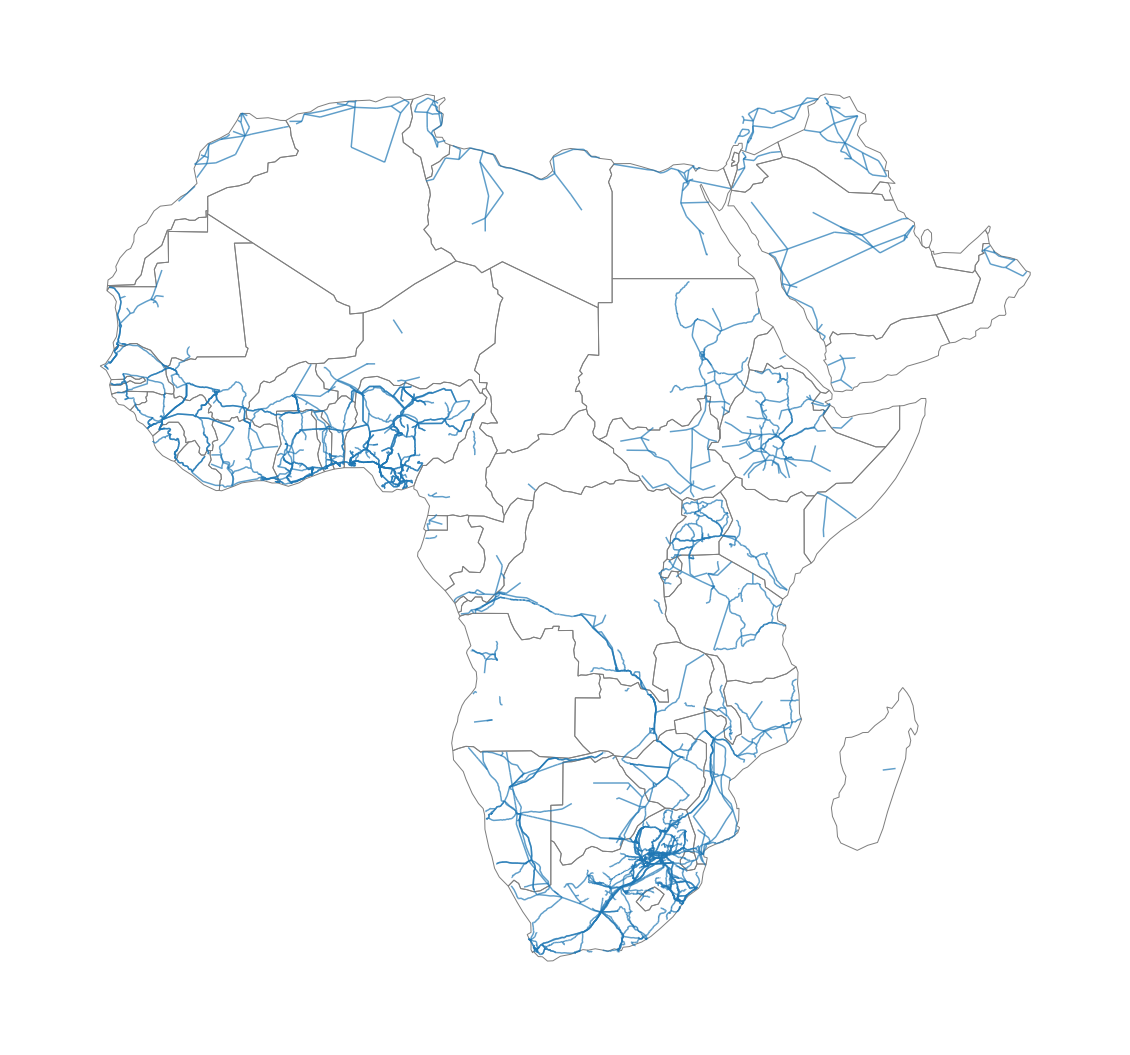

In [27]:
ax = africa_network[africa_network.voltage_kV > 100].plot(figsize=(20, 20), alpha=0.7)
geoplot.polyplot(africa, edgecolor="gray", ax=ax)
# plt.savefig('africa_transmission_100.png')

# ADDITIONAL FOUND DATA. Network Data MENA (existing+planned)

In [16]:
### datasource:   https://energydata.info/dataset/mena-electricity-transmission-network-2017


Main nodes and major lines of the electricity transmission network of the MENA region. Interconnection lines with countries outside of the region included. The properties for nodes are "name" and "node type" (city, town, plant, dam...). The properties for lines are the "transmission power" in kV (e.g. 400), the "type of line" (single, double...), the linked nodes (identified by the nodes names) and, for international interconnections, the "interconnection" property gathers the two linked countries identified by name. The format is GeoJSON, nodes are displayed as points and lines as lines. Data comes from the Arab Union of Electricity and country utilities.


In [17]:
url = "https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/145365/electric-network-mena.geojson"
mena_network = gpd.read_file(url)

In [18]:
# pd.set_option('display.max_rows', 600)
# pd.set_option('display.max_columns', 600)

In [19]:
mena_network = mena_network.rename(columns={"transmissionPower": "voltage_kV"})
mena_network.head()

,name,nodeType,voltage_kV,lineType,geometry
0,Laayoune,city,NaN,None,POINT (-13.19424 27.16059)
1,Tan-Tan,town,NaN,None,POINT (-11.10374 28.44092)
2,Tiznit,town,NaN,None,POINT (-9.73011 29.69760)
3,Agadir,city,NaN,None,POINT (-9.57733 30.41937)
4,None,None,400.0,double,"LINESTRING (-13.19424 27.16059, -11.10374 28.4..."


<AxesSubplot:>

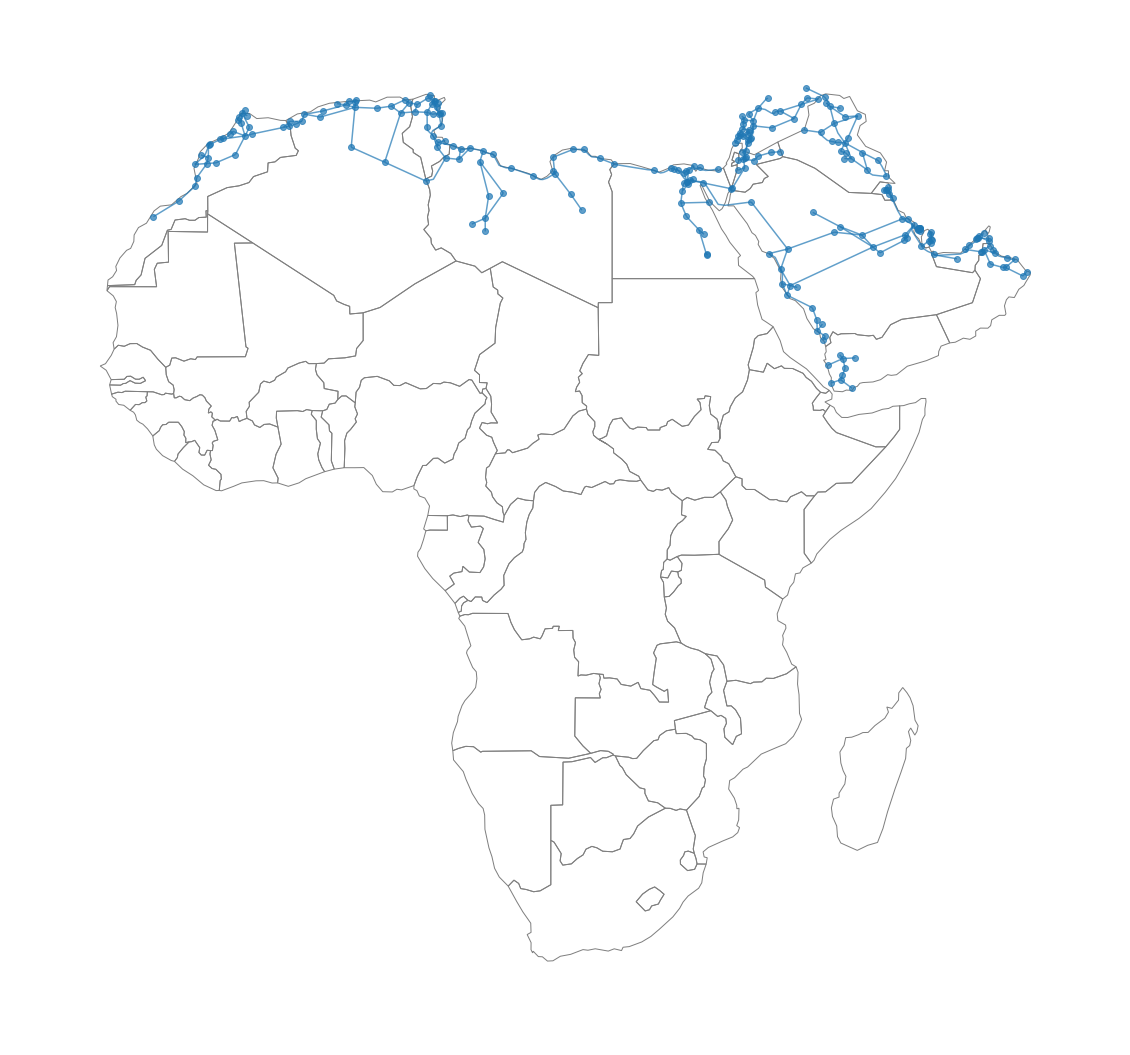

In [20]:
ax = mena_network.plot(figsize=(20, 20), alpha=0.7)
geoplot.polyplot(africa, edgecolor="gray", ax=ax)